# <center>Méthode des moindres carrés</center>

### Le problème de la régression consiste à rechercher une relation pouvant éventuellement exister entre les x et les y, par exemple de la forme y = f(x). 

Lorsque la relation recherchée est affine, c’est-à-dire de la forme y = ax + b, on parle de régression linéaire. Mais même si une telle relation est effectivement présente, les données mesurées ne vérifient pas en général cette relation exactement. 

Pour tenir compte dans le modèle mathématique des erreurs observées, on considère les données {y1, y2,...,yn} comme autant de réalisations d’une variable aléatoire Y et les données {x1, x2,...,xn} comme autant de réalisations d’une variable aléatoire X. 

Les données {(xi, yi), i = 1,...,n} peuvent être représentées par un nuage de n points dans le plan (x, y). Le centre de gravité de ce nuage peut se calculer facilement : il s’agit du point de coordonnées (x̅, y barre) 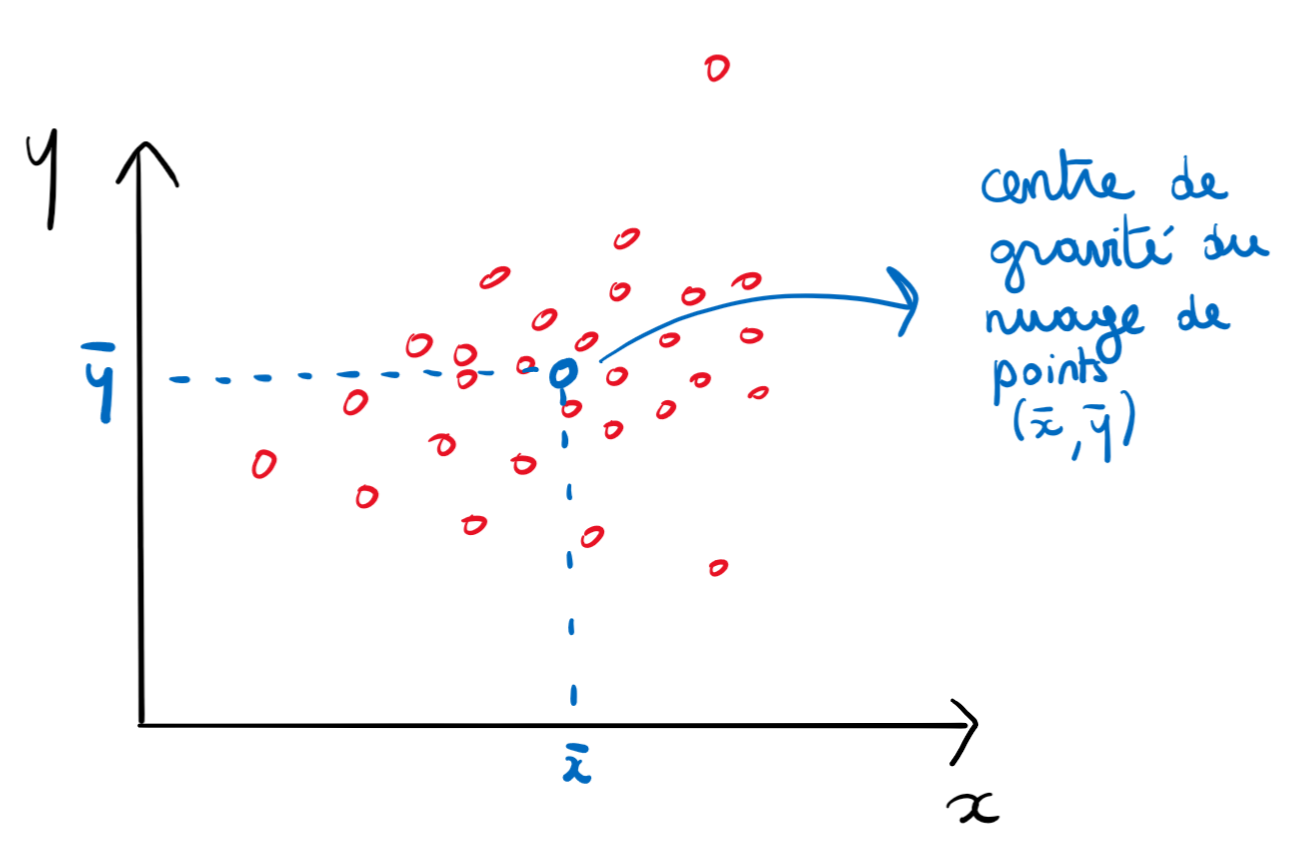

### Rechercher une relation affine entre les variables X et Y revient à rechercher une droite qui s’ajuste le mieux possible à ce nuage de points.
Parmi toutes les droites possibles, on retient celle qui a une propriété remarquable : c’est celle qui rend minimale la somme des carrés des écarts des valeurs observées yi à la droite ŷi = axi + b

### On cherche donc à choisir les valeurs de a et b qui minimisent : 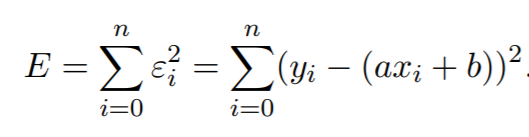

### Un calcul montre que ces valeurs notées sont égales à : 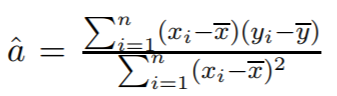

### 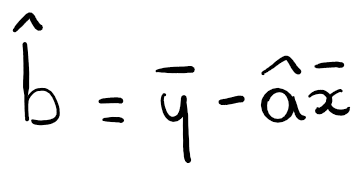

#### On a donc la droite de régressiuon écrite sous la forme suivante avec : 
- ŷ : valeur estimée de la variable de réponse 
- b : constante de la droite de régression
- a : la pente de la droite de régression
- a et b : les coefficients de la régression
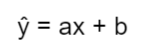

### Schématiquement, cela donne : 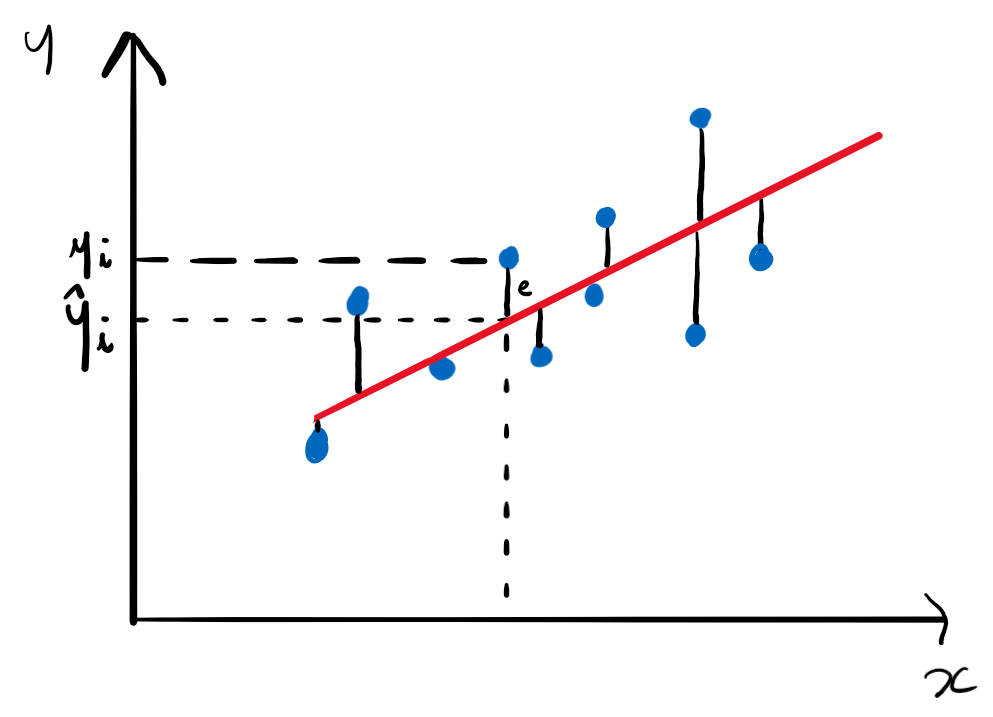

# Présentation analyse d'un jeu de données 

#### Présentation du data set : 
- Rang : placement à la fin de la saison
- Equipe : nom de l'équipe
- J : nb de matchs joués
- G : nb de matchs gagnés
- N : nb de matchs nuls
- P : nb de matchs perdus
- Bp : nb de buts marqués
- Bc : nb de buts encaissés
- Diff : différence buts marqués et buts encaissés

#### On importe les librairies utilisées :

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### On charge les données et on affiche les premieres lignes

In [100]:
data = pd.read_csv('ligue1_20182019.csv')
print(data.shape)
print(data.head())

(20, 10)
   Rang                   Équipe  Pts   J   G  N   P   Bp  Bc  Diff
0     1  Paris Saint-Germain T S   91  38  29  4   5  105  35    70
1     2                Lille OSC   75  38  22  9   7   68  33    35
2     3       Olympique Lyonnais   72  38  21  9   8   70  47    23
3     4         AS Saint-Étienne   66  38  19  9  10   59  41    18
4     5   Olympique de Marseille   61  38  18  7  13   60  52     8


#### On affecte à des variables les données qui nous intéressent

In [101]:
X = data['G'].values
Y = data['Bp'].values
Z = data['Bc'].values
W = data['P'].values

#### Calcul de la moyenne
On affecte à n le nombre de valeurs pour les victoires (20) qui est le même que le nombre de valeurs pour les défaites (20) car c'est un championnat à 20 équipes.

In [102]:
mean_x = np.mean(X)
mean_y = np.mean(Y)
mean_z = np.mean(Z)
mean_w = np.mean(W)
print("Moyenne de X (nb victoires): ")
print(mean_x)
print("Moyenne de Y (but marqués): ")
print(mean_y)
print("Moyenne de Z (but encaissés): ")
print(mean_z)
print("Moyenne de W (nb défaites): ")
print(mean_w)

n = len(X)
p = len(W)

Moyenne de X (nb victoires): 
13.5
Moyenne de Y (but marqués): 
48.6
Moyenne de Z (but encaissés): 
48.6
Moyenne de W (nb défaites): 
13.5


#### Calcul de m qui représente la pente dans y = mx + c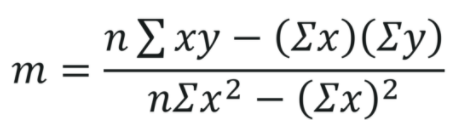

In [103]:
numer = 0
denom = 0
for i in range(n):
    numer+= (X[i] - mean_x) * (Y[i] - mean_y) # numerateur += car n * ...
    denom+= (X[i] - mean_x) ** 2 # denominateur += car n * ...
    m = numer / denom
    c = mean_y - (m * mean_x)

print("Coeff m : ")
print(m)
print("Coeff c : ")
print(c)

Coeff m : 
2.88112927191679
Coeff c : 
9.704754829123338


#### Lien entre victoires et buts marqués ?

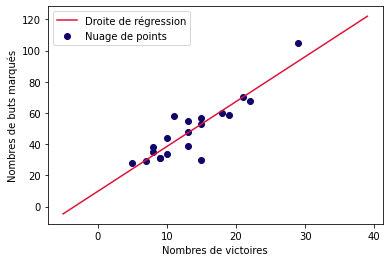

In [104]:
max_x = np.max(X) + 10
min_x = np.min(X) - 10

x = np.linspace(min_x, max_x, 1000)
y = c + m * x

plt.plot(x, y, c='#DC143C', label='Droite de régression')
plt.scatter(X,Y, c='#0f056b', label="Nuage de points")

plt.xlabel("Nombres de victoires")
plt.ylabel("Nombres de buts marqués")
plt.legend()
plt.show()

### Calcul du Root Mean Squares Error (ou Erreur Quadratique Moyenne) : mesure permettant de voir la différence entre les valeurs prédites par un modèle et les valeurs observées 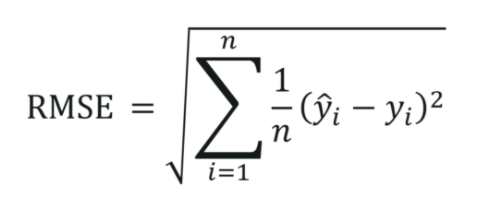

C'est la moyenne arithmétique des carrés des écarts entre prévisions du modèle et observations. Plus la RMSE est petite, plus la prédiction observée est pertinente. 
La racine carré sert seulement à réduire cette valeur ici.

In [105]:
rmse = 0
for i in range(n):
    y_pred = c + m * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print("RMSE : ")
print(rmse)

RMSE : 
8.013396102007386


### Calcul du R² qui est le coefficient de détermination, une mesure de la qualité de la prédiction d'une régression linéaire (compris entre 0 et 1)

Même si celui-ci est de moins en moins utilisé pour diverses raisons. Par exemple, pour une même dispersion des points autour de la droite de régression, pour une étendue différente, la valeur du R2 ne va pas être la même. 

In [106]:
ss_tot = 0
ss_res = 0
for i in range(p):
    y_pred = c + m * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score")
print(r2)


R2 Score
0.8130799409452548


### Calcul du m :

In [107]:
numer = 0
denom = 0
for i in range(n):
    numer+= (W[i] - mean_w) * (Z[i] - mean_z)
    denom+= (W[i] - mean_w) ** 2
    m = numer / denom
    c = mean_z - (m * mean_w)

print("Coeff m : ")
print(m)
print("Coeff c : ")
print(c)

Coeff m : 
1.5148741418764302
Coeff c : 
28.149199084668194


### Lien entre défaites et buts encaissés ? 

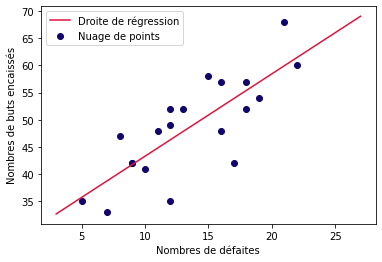

In [108]:
max_w = np.max(W) + 5
min_w = np.min(W) - 2

w = np.linspace(min_w, max_w, 1000)
z = c + m * w

plt.plot(w, z, c='#DC143C', label='Droite de régression')
plt.scatter(W,Z, c='#0f056b', label="Nuage de points")

plt.xlabel("Nombres de défaites")
plt.ylabel("Nombres de buts encaissés")
plt.legend()
plt.show()

#### Calcul RMSE 

In [109]:
rmse = 0
for i in range(n):
    z_pred = c + m * W[i]
    rmse += (Z[i] - z_pred) ** 2
rmse = np.sqrt(rmse/n)
print("RMSE : ")
print(rmse)

RMSE : 
5.486133967001732


#### Calcul r²

In [110]:
ss_tot = 0
ss_res = 0
for i in range(n):
    z_pred = c + m * W[i]
    ss_tot += (Z[i] - mean_z) ** 2
    ss_res += (Z[i] - z_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print("R2 Score")
print(r2)

R2 Score
0.6249044628129343


### La méthode des moindres carrés permet de faire des analyses sur des problèmes simples, avec un nombre limité de données. 
Certaines librairies Python utilisent cette méthode (comme LinearRegression de scikitlearn) car elle reste tout de même bien efficace lorsque l'on commence l'analyse d'un data set.

### D'un point de vue prédiction et pronostic, la méthode reste néanmoins compliqué à utiliser. 
En effet, il est très couteux en temps d'analyser deux variables un certain nombres de fois pour en conclure des éléments qui pourraient être biaisés entre eux. 

Par exemple : comment savoir si le nombre de buts encaissés par une équipe est dépendant de l'emplacement du match (domicile / exterieur) ou du temps qu'il faisait le jour des matchs. 

### D'autres méthodes d'analyses et d'optimisation sont beaucoup plus utilisés.
On pense notamment à la méthode de descente de gradient ou à celle des k plus proches voisins qui est utilisé pour des cas de régressions et de classifications.

#### Réalisé par Rémi Saurel